In [61]:
import tensorflow as tf
from tensorflow import keras
import os

In [62]:
img_catagories=os.listdir("E:\Vegetable Images\\train")
img_catagories

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [63]:
img_catagories=img_catagories[:5]

In [64]:
train_path="E:\Vegetable Images\\train"
test_path="E:\Vegetable Images\\test"
validate_path="E:\Vegetable Images\\validation"

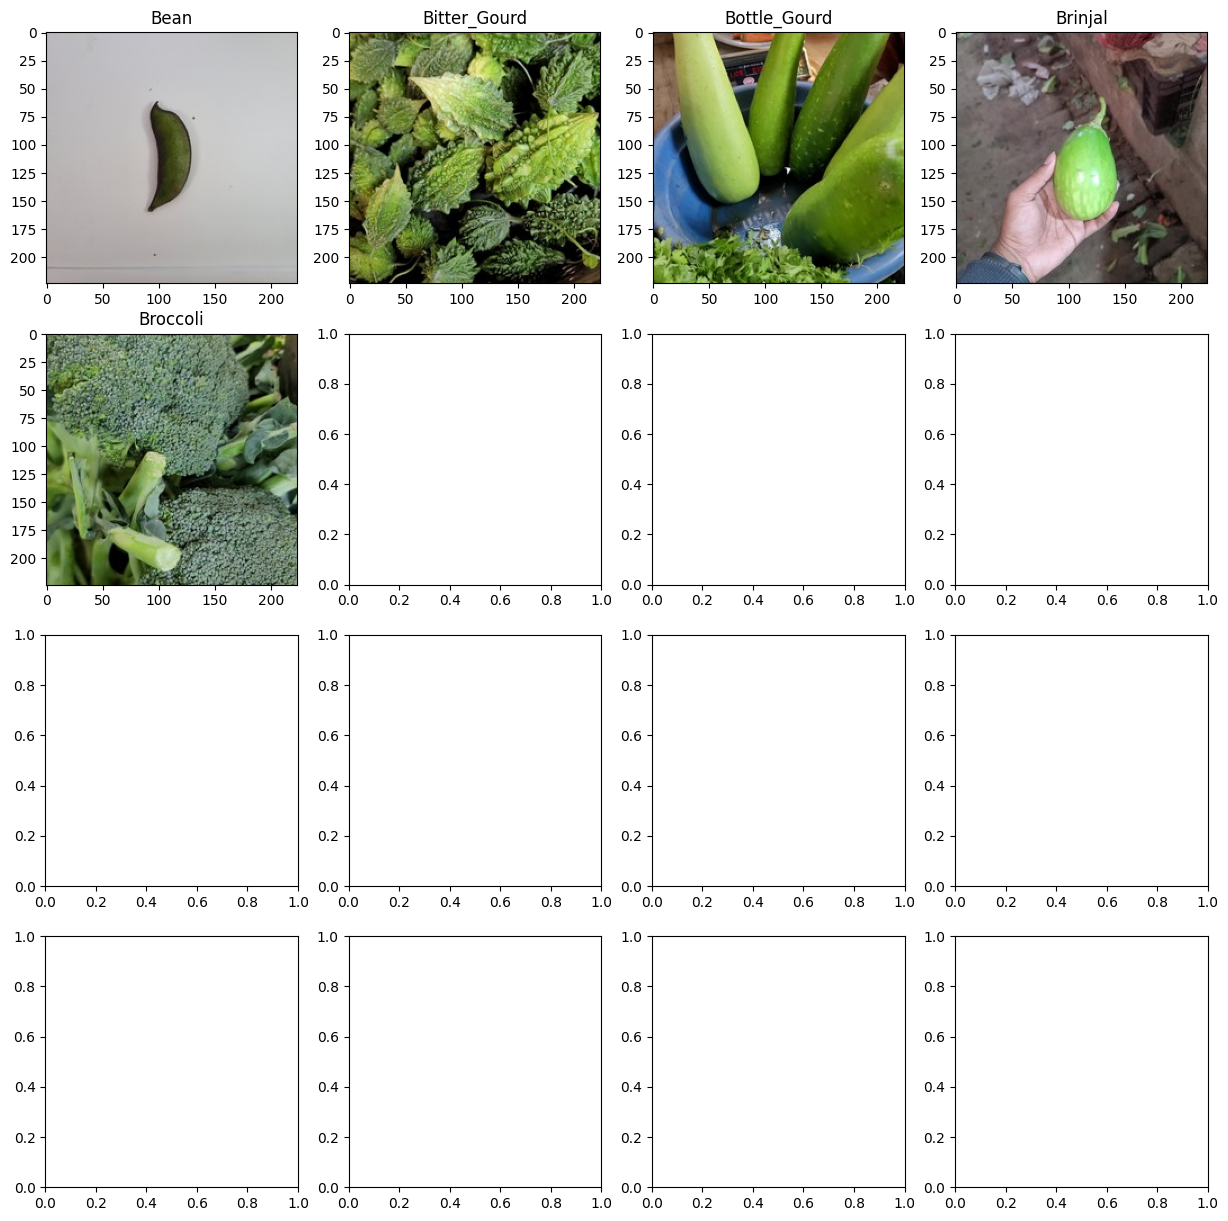

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
fig, axes = plt.subplots(2, 4, figsize=(15, 15)) # create  a 4 X 4 plot array
axes = axes.flatten()  # flatten the axes to plot image (this is required)

for i,catagory in enumerate(img_catagories):
    cat_path=train_path+"/"+catagory # add the catagory and create the catagory path
    images_in_folder=os.listdir(cat_path) #get all the images of that folder
    cat_image=image.load_img(cat_path+"/"+images_in_folder[0]) # get the first image
    cat_image=image.img_to_array(cat_image) / 255.0 #normalize it

    # then plot it in every corresponding index
    ax=axes[i]
    ax.set_title(catagory)
    ax.imshow(cat_image)


In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
train_generator = datagen.flow_from_directory(
        train_path,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        classes=img_catagories, # to avoid huge time to train , we use only 5 catagories only
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = datagen.flow_from_directory(
        validate_path,
        target_size=(150, 150),
        batch_size=32,
        classes=img_catagories,
        class_mode='categorical')

Found 5000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

model = Sequential() # model object

# Add 2 convolutional layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251,525 (42.92 MB)

 Trainable params: 11,251,525 (42.92 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
hist = model.fit(train_generator, 
                 epochs=15, 
                 verbose=1, 
                 validation_data=validation_generator, 
                 steps_per_epoch = 5000//32, 
                 validation_steps = 1000//32
                 )

Epoch 1/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 57s 362ms/step - accuracy: 0.3467 - loss: 1.6324 - val_accuracy: 0.6300 - val_loss: 0.8538
Epoch 2/15
  1/156 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.6562 - loss: 0.7592

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.6562 - loss: 0.7592 - val_accuracy: 0.6421 - val_loss: 0.8781
Epoch 3/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 386ms/step - accuracy: 0.6802 - loss: 0.8297 - val_accuracy: 0.7490 - val_loss: 0.6385
Epoch 4/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5938 - loss: 0.9436 - val_accuracy: 0.6694 - val_loss: 0.7670
Epoch 5/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 383ms/step - accuracy: 0.7233 - loss: 0.6914 - val_accuracy: 0.8306 - val_loss: 0.4223
Epoch 6/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9062 - loss: 0.3470 - val_accuracy: 0.8196 - val_loss: 0.4605
Epoch 7/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 382ms/step - accuracy: 0.8178 - loss: 0.4904 - val_accuracy: 0.8599 - val_loss: 0.3823
Epoch 8/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8750 - loss: 0.5065 - val_accuracy: 0.8639 - val_loss: 0.3866
Epoch 9/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 77s 494ms/step - accuracy: 0.8420 - loss: 0.4551 - val_accurac

In [71]:
test_generator = datagen.flow_from_directory(
        validate_path,
        target_size=(150, 150),
        batch_size=32,
        classes=img_catagories,
        class_mode='categorical')

Found 1000 images belonging to 5 classes.


In [72]:
model.evaluate(test_generator)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9517 - loss: 0.1568


[0.17812317609786987, 0.9419999718666077]